# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
dataset = pd.read_csv('Datasets\city_day.csv')

In [4]:
dataset.shape

(29531, 16)

In [5]:
dataset.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [6]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.rename(columns = {'AQI_Bucket':'Air Quality'}, inplace = True)

In [8]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## Analyzing the Target Variable

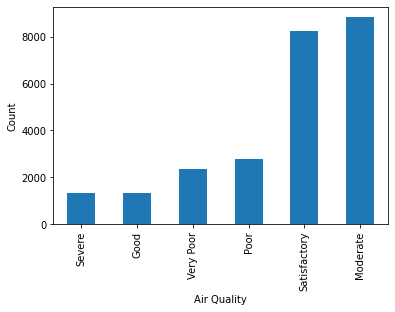

In [9]:
dataset.groupby('Air Quality')['City'].count().sort_values(ascending = True).plot.bar()
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()

In [10]:
print(f"Good: {np.round((dataset['Air Quality'].value_counts()['Good'] / len(dataset)) * 100, 4)}%")
print(f"Moderate: {np.round((dataset['Air Quality'].value_counts()['Moderate'] / len(dataset)) * 100, 4)}%")
print(f"Poor: {np.round((dataset['Air Quality'].value_counts()['Poor'] / len(dataset)) * 100, 4)}%")
print(f"Satisfactory: {np.round((dataset['Air Quality'].value_counts()['Satisfactory'] / len(dataset)) * 100, 4)}%")
print(f"Severe: {np.round((dataset['Air Quality'].value_counts()['Severe'] / len(dataset)) * 100, 4)}%")
print(f"Very Poor: {np.round((dataset['Air Quality'].value_counts()['Very Poor'] / len(dataset)) * 100, 4)}%")

Good: 4.541%
Moderate: 29.8974%
Poor: 9.4172%
Satisfactory: 27.8487%
Severe: 4.5308%
Very Poor: 7.9137%


## Identifying the missing values

<AxesSubplot:>

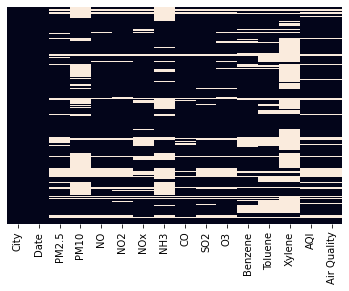

In [11]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [12]:
dataset.isnull().sum()

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air Quality     4681
dtype: int64

In [13]:
# Separating the features having null values
null_features = []
for feature in dataset.columns:
    if dataset[feature].isnull().sum()>1:
        null_features.append(feature)

for feature in null_features:
    print(f"{feature} has {np.round(dataset[feature].isnull().mean()*100, 4)}% Missing Values")

PM2.5 has 15.5701% Missing Values
PM10 has 37.7231% Missing Values
NO has 12.1296% Missing Values
NO2 has 12.1398% Missing Values
NOx has 14.1715% Missing Values
NH3 has 34.9734% Missing Values
CO has 6.9723% Missing Values
SO2 has 13.0507% Missing Values
O3 has 13.6196% Missing Values
Benzene has 19.041% Missing Values
Toluene has 27.229% Missing Values
Xylene has 61.322% Missing Values
AQI has 15.8511% Missing Values
Air Quality has 15.8511% Missing Values


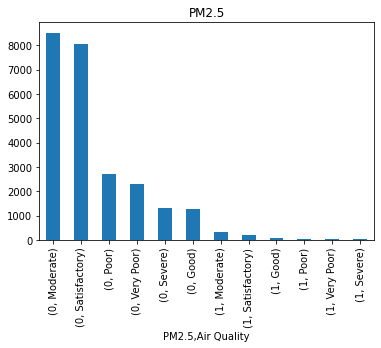

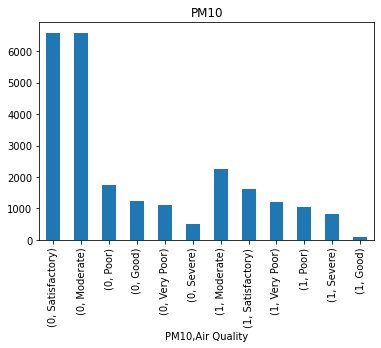

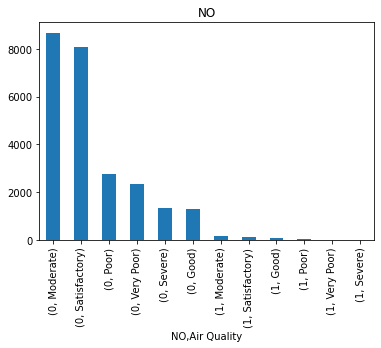

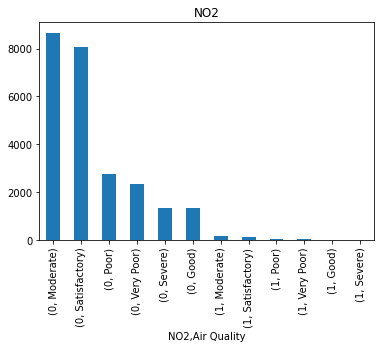

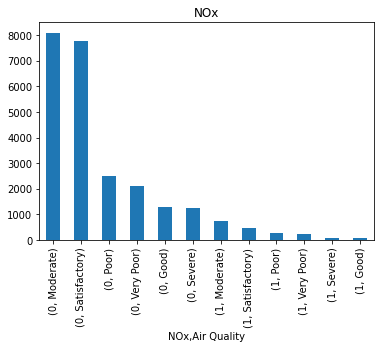

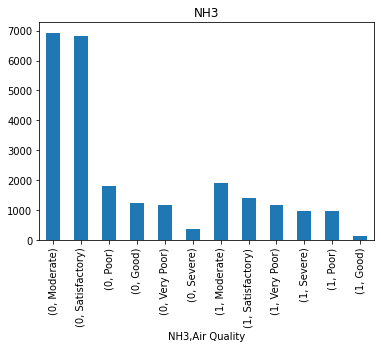

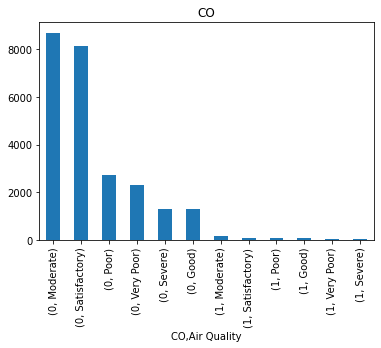

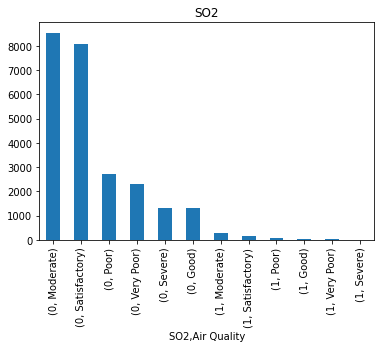

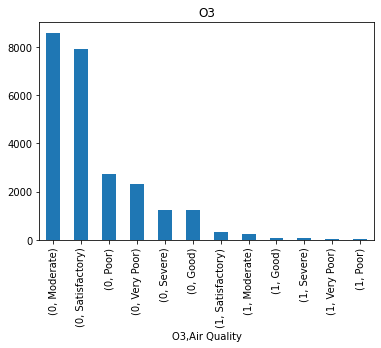

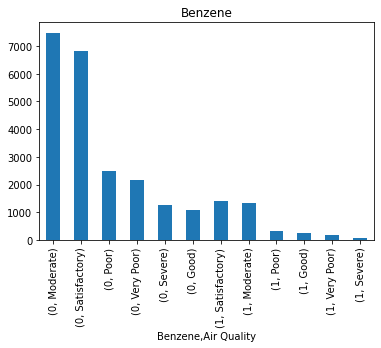

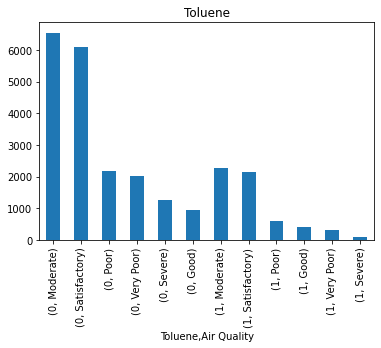

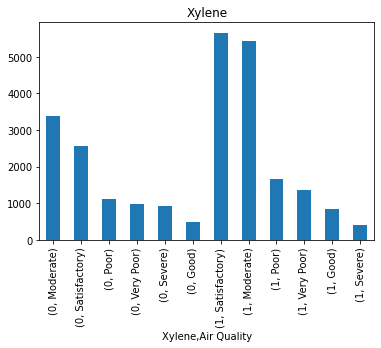

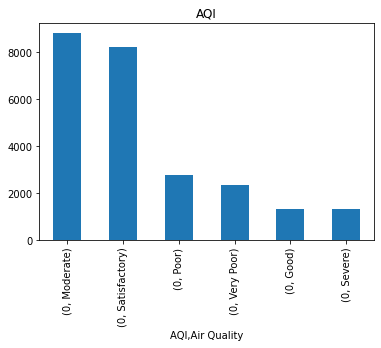

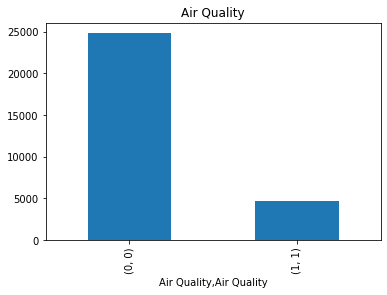

In [14]:
for feature in null_features:
    data = dataset.copy()
    
    # Replacing null values to 1 and not null to 0 to see their effect on the dependent variable
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Determining the count for dependent variable for each categories
    data.groupby(feature)['Air Quality'].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

From the above graphs it is observent that the features with the missing values significantly contribute to Air Quality. So such features cannot be ignored, especially Xylene hence feature engineering is important to replace the NaN values to a reasonable value

## Categorizing the Features

### Numerical Features

In [15]:
# Separating the features having numerical values
numerical_features = []
for feature in dataset.columns:
    if dataset[feature].dtypes != 'O' and dataset[feature].dtypes != 'datetime64[ns]':
        numerical_features.append(feature)

print(f"The number of numerical features are: {len(numerical_features)}")

The number of numerical features are: 13


In [16]:
dataset[numerical_features].head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


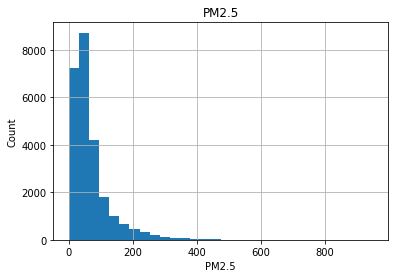

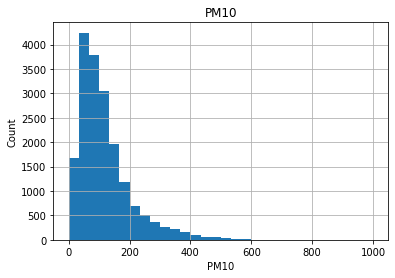

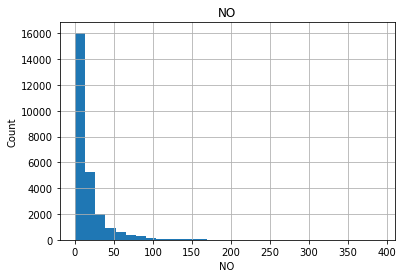

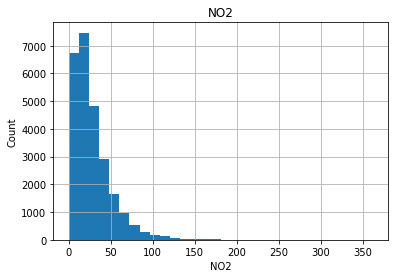

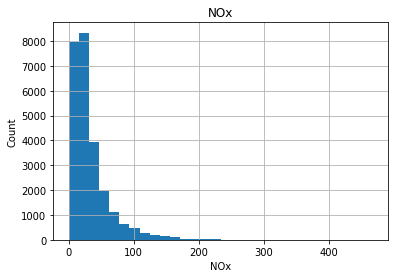

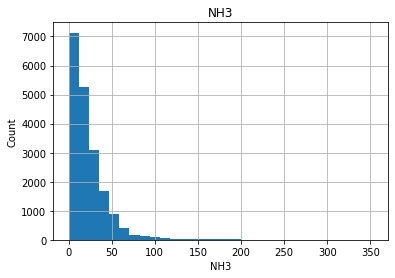

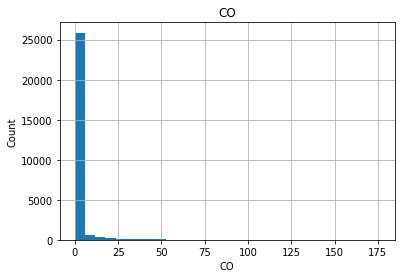

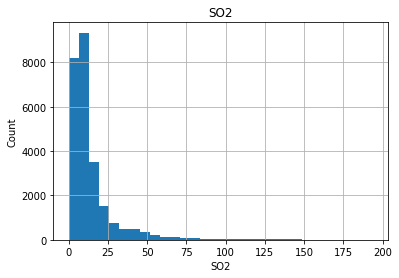

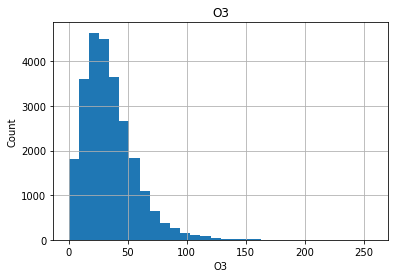

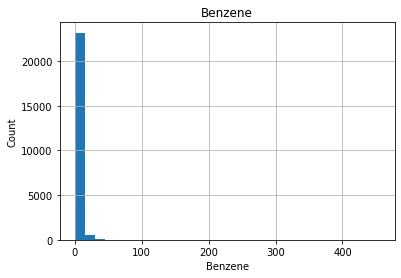

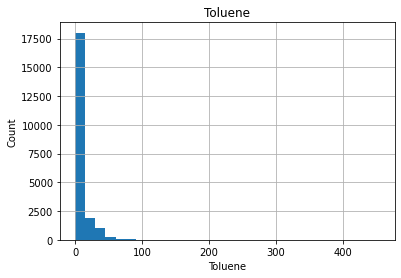

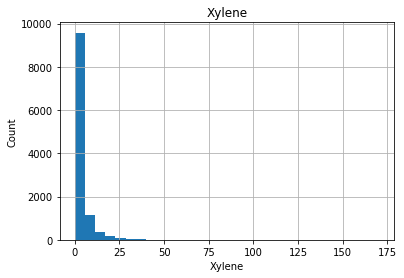

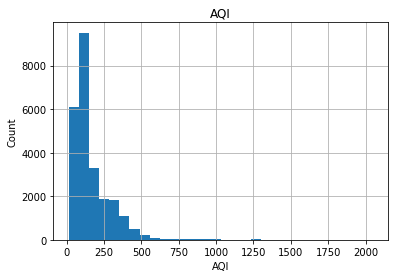

In [17]:
for feature in numerical_features:
    data = dataset.copy()
    
    # Determining the count for dependent variable for each categories
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

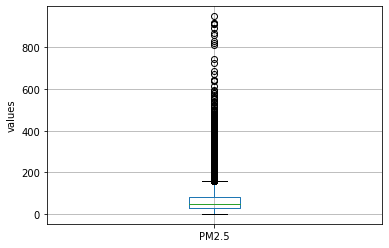

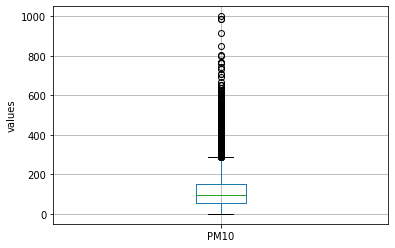

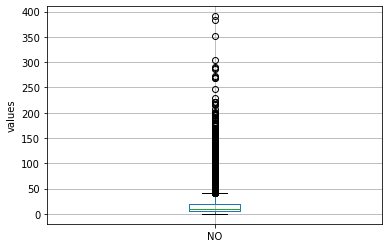

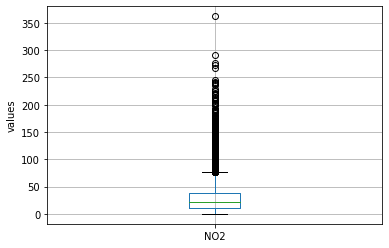

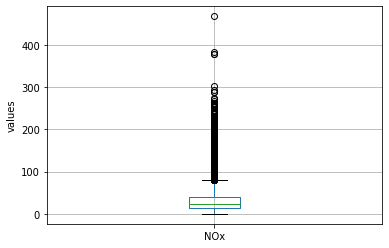

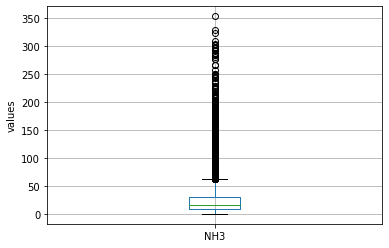

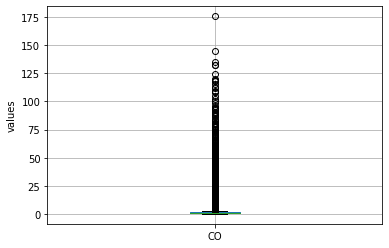

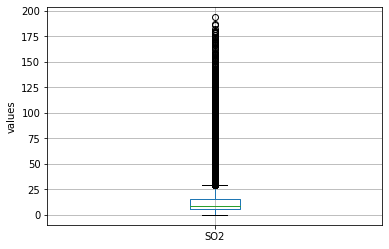

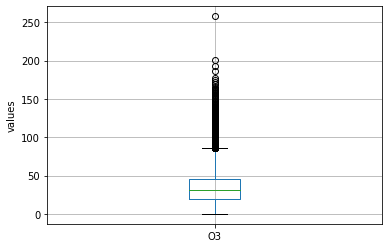

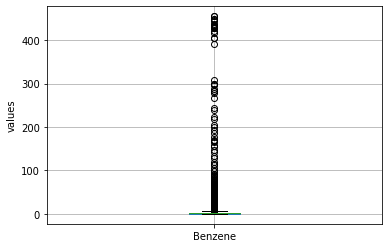

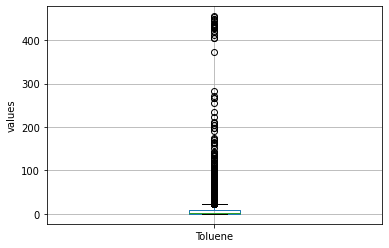

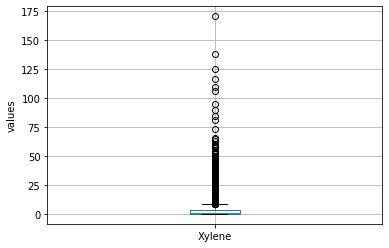

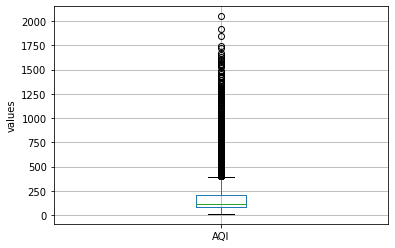

In [18]:
for feature in numerical_features:
    data = dataset.copy()
    
    data.boxplot(column = feature)
    plt.ylabel('values')
    plt.show()

### Catergorical Features

In [19]:
# Separating the features having Catergorical values
categorical_features = []
for feature in dataset.columns:
    if dataset[feature].dtypes == 'O' and feature != 'Air Quality':
        categorical_features.append(feature)

print(f"The number of categorical features are: {len(categorical_features)}")

The number of categorical features are: 1


In [20]:
for feature in categorical_features:
    print(f"{feature} : {len(dataset[feature].unique())} Categories")

City : 26 Categories


# Feature Engineering

In [21]:
# Filling the missing values of all the numerical data
for feature in numerical_features:
    if (dataset[feature].isnull().mean()*100) >= 25:
        dataset[feature] = dataset[feature].fillna(dataset[feature].mean())
    else:
        dataset[feature] = dataset[feature].fillna(dataset[feature].median())

As the numerical features with null values greater than 25 have larger values of 0 replacing them with the median of the particular column is not a good option, So those particular features are replaced by the mean value of the column and rest others are replaced by the median as there are a large number of outliers in their cases

In [22]:
dataset[numerical_features].isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [23]:
# Filling the missing values of all the Categorical data
dataset['Air Quality'] = dataset['Air Quality'].fillna('Moderate')

Air Quality variable had maximum percentage of Moderate Category (29.8974%) so replacing NaN values with it is a good alternative

In [24]:
dataset['Air Quality'].isnull().sum()

0

In [25]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Ahmedabad,2015-01-01,48.57,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


### Few More Data Analysis

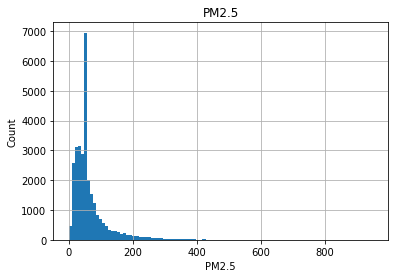

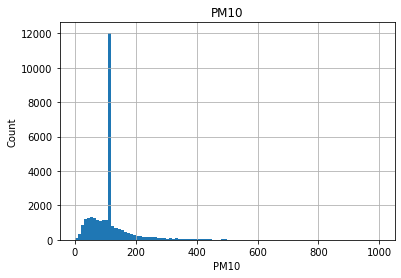

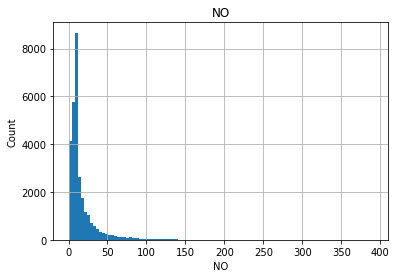

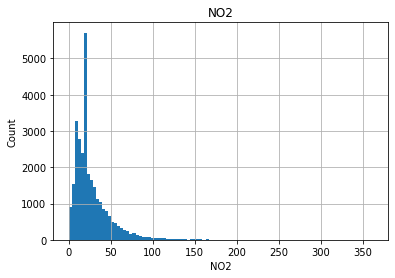

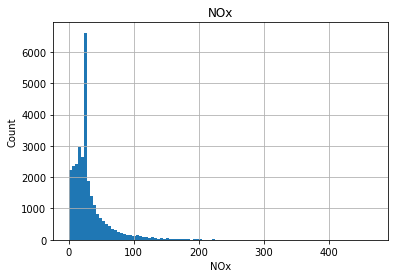

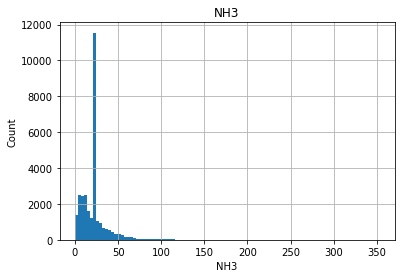

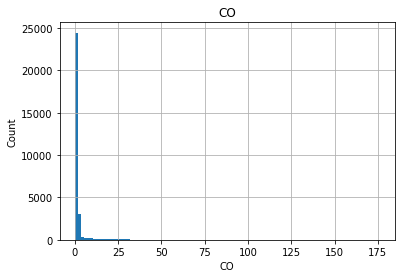

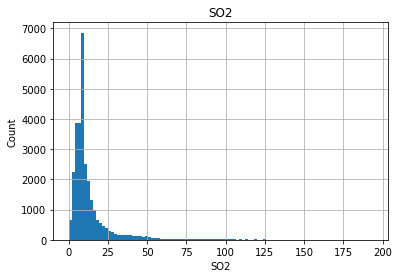

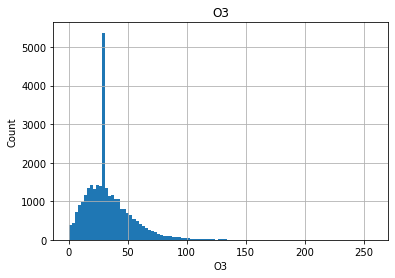

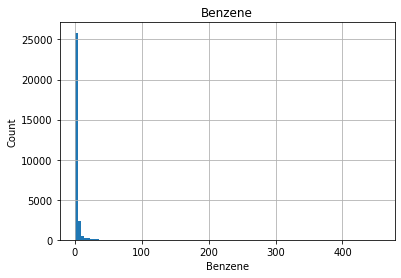

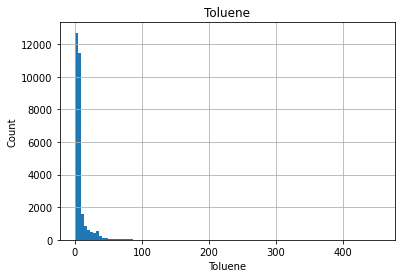

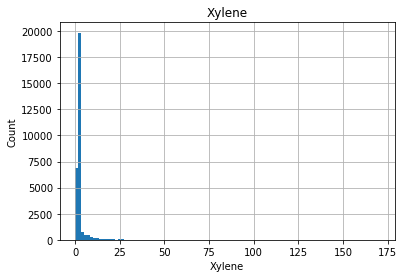

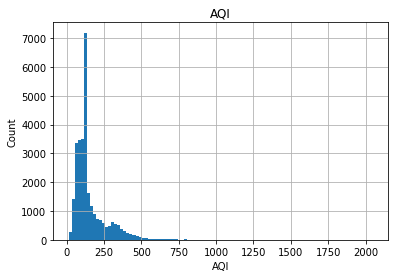

In [26]:
for feature in numerical_features:
    data = dataset.copy()
    
    # Determining the histogram for dependent variable for each categories
    data[feature].hist(bins=100)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

As one can see the above numerical data is a bit left skewed so with the help of log transformation, we can balance out the dataset

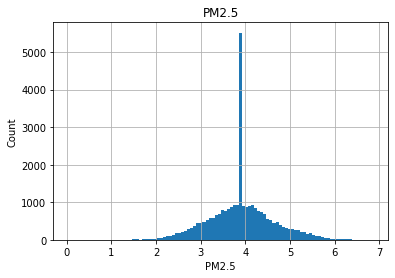

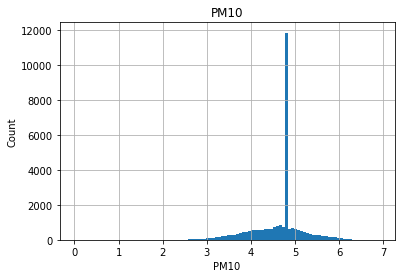

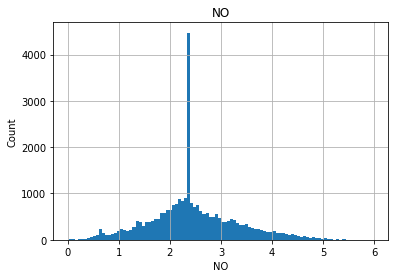

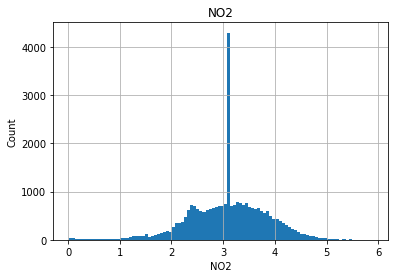

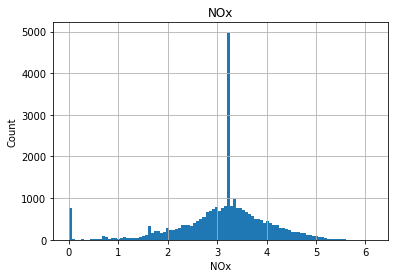

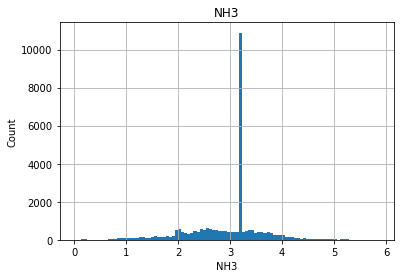

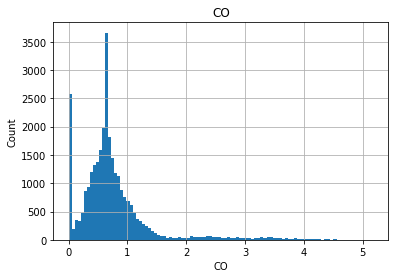

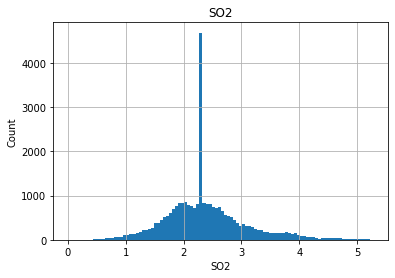

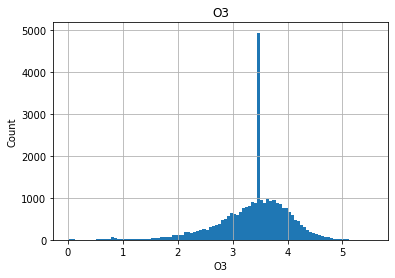

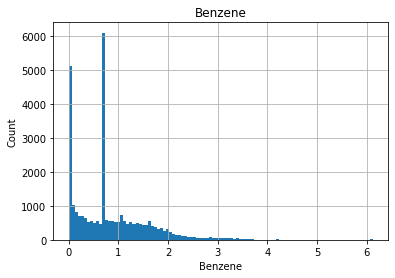

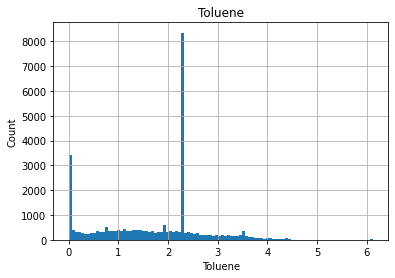

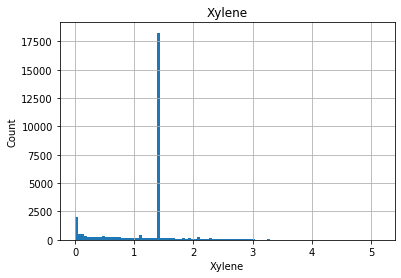

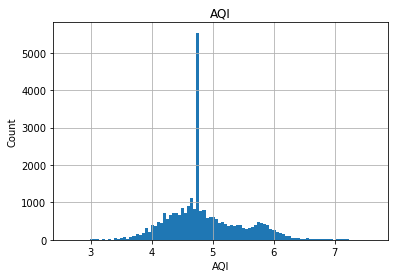

In [27]:
# Applying Log transformation

for feature in numerical_features:
    data = dataset.copy()

    data[feature] = np.log(data[feature] + 1)
    
    # Determining the histogram for dependent variable for each categories
    data[feature].hist(bins=100)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()    

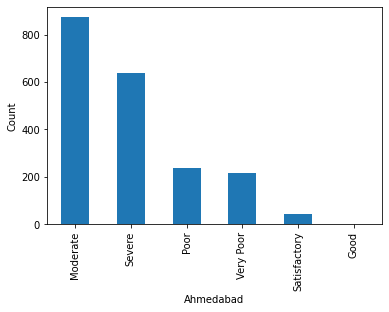

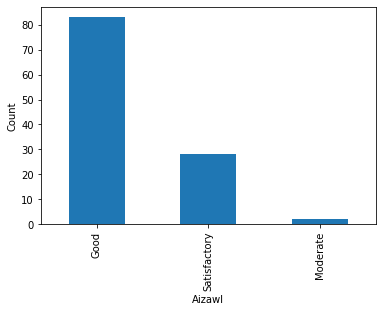

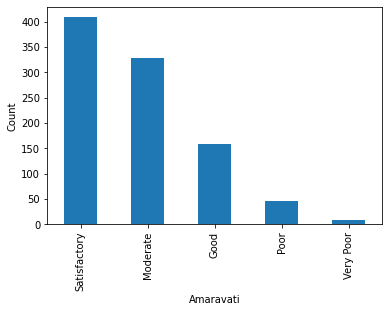

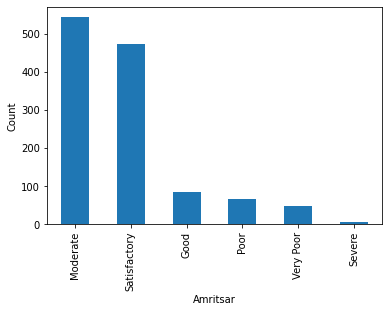

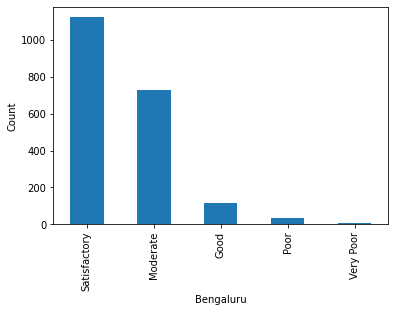

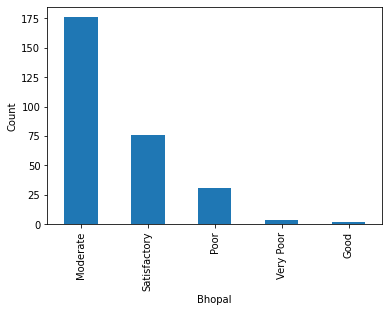

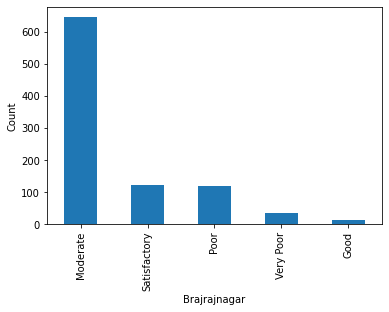

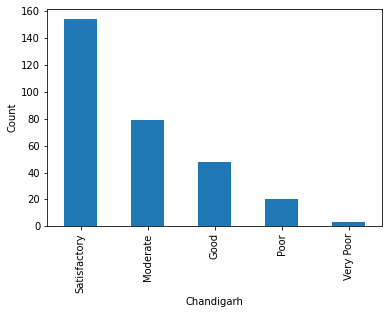

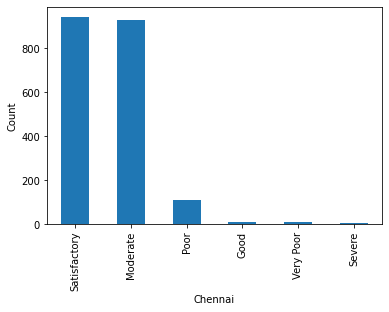

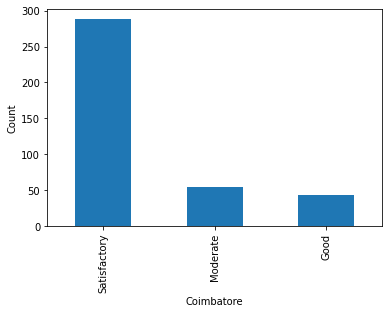

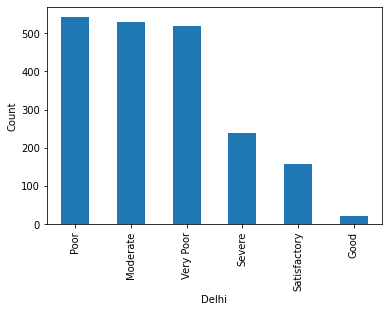

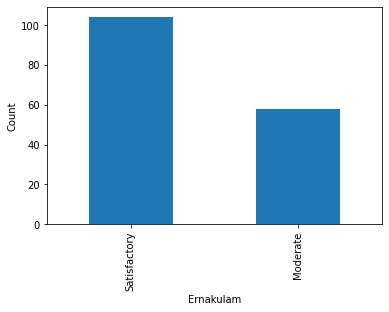

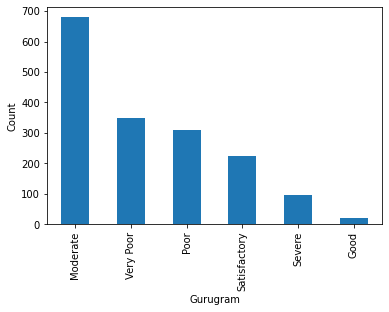

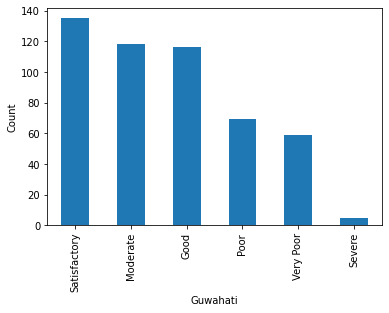

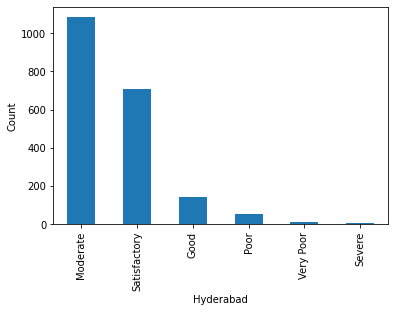

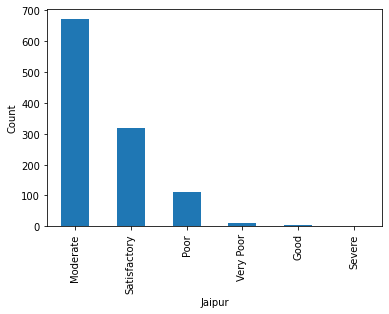

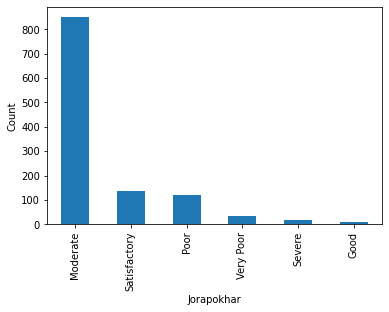

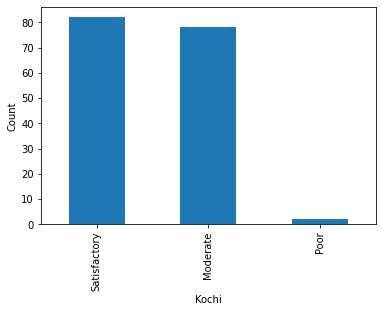

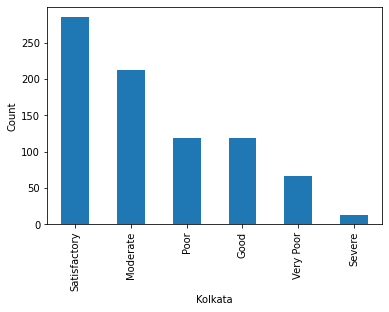

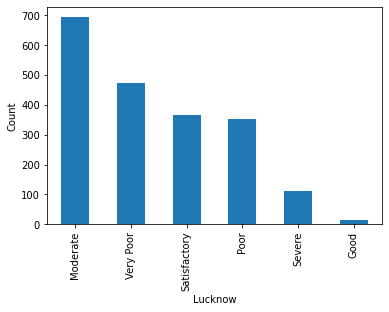

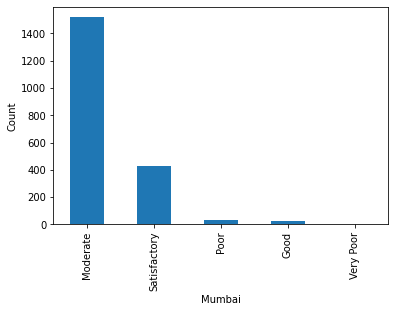

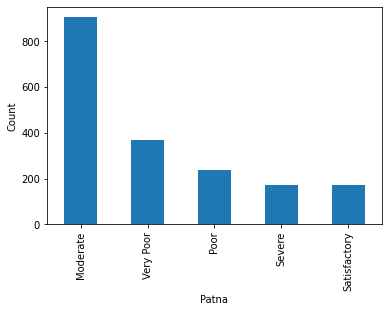

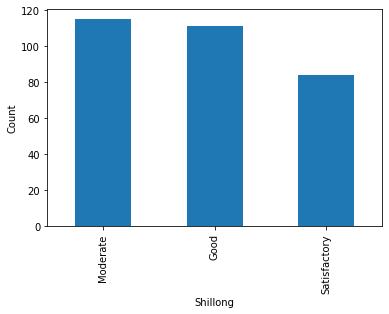

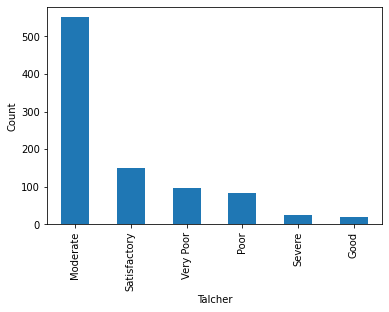

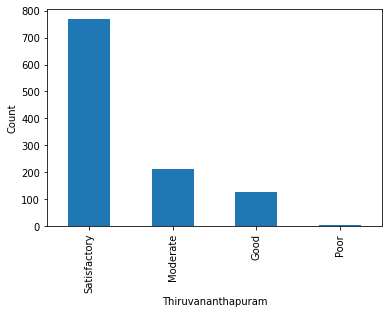

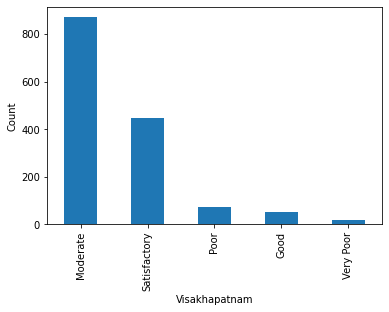

In [28]:
for feature in categorical_features:
    for city in dataset['City'].unique():
        # Getting histogram of categories for each city
        dataset.groupby(feature).get_group(city)['Air Quality'].value_counts().plot.bar()
        
        plt.xlabel(city)
        plt.ylabel('Count')
        plt.show()

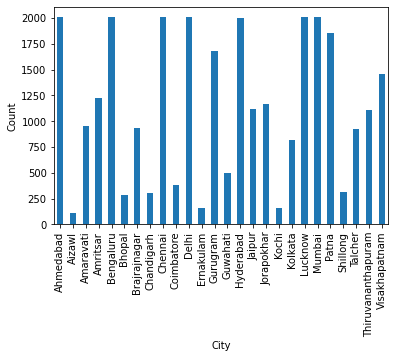

In [29]:
for feature in categorical_features:
    # Getting histogram for each city
    dataset.groupby(feature)['Air Quality'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# More Feature Engineering

In [30]:
df = dataset.copy()
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Ahmedabad,2015-01-01,48.57,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


### Log Tranformation of Numerical Features

In [31]:
for feature in numerical_features:
    df[feature] = np.log(1 + df[feature])

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Ahmedabad,2015-01-01,3.903386,4.780191,0.652325,2.955951,2.898671,3.197998,0.652325,3.354804,4.900523,0.000000,0.019803,0.000000,4.779123,Moderate
1,Ahmedabad,2015-01-02,3.903386,4.780191,0.678034,2.814810,2.859913,3.197998,0.678034,3.240637,3.557061,1.543298,1.871802,1.562346,4.779123,Moderate
2,Ahmedabad,2015-01-03,3.903386,4.780191,2.912351,3.010621,3.424263,3.197998,2.912351,3.403528,3.456317,2.054124,2.856470,1.178655,4.779123,Moderate
3,Ahmedabad,2015-01-04,3.903386,4.780191,0.993252,2.969388,2.942859,3.197998,0.993252,2.975019,3.613078,1.691939,2.410542,0.693147,4.779123,Moderate
4,Ahmedabad,2015-01-05,3.903386,4.780191,3.139833,3.109953,3.657389,3.197998,3.139833,3.697096,3.696600,2.080691,2.990217,1.329724,4.779123,Moderate


In [32]:
df.to_csv('Datasets\Processed_City_Day.csv', index = False)

### Encoding the Categorical Features

In [33]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [34]:
df['City'] = LE.fit_transform(df['City'])
df['Air Quality'] = LE.fit_transform(df['Air Quality'])

In [35]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,0,2015-01-01,3.903386,4.780191,0.652325,2.955951,2.898671,3.197998,0.652325,3.354804,4.900523,0.000000,0.019803,0.000000,4.779123,1
1,0,2015-01-02,3.903386,4.780191,0.678034,2.814810,2.859913,3.197998,0.678034,3.240637,3.557061,1.543298,1.871802,1.562346,4.779123,1
2,0,2015-01-03,3.903386,4.780191,2.912351,3.010621,3.424263,3.197998,2.912351,3.403528,3.456317,2.054124,2.856470,1.178655,4.779123,1
3,0,2015-01-04,3.903386,4.780191,0.993252,2.969388,2.942859,3.197998,0.993252,2.975019,3.613078,1.691939,2.410542,0.693147,4.779123,1
4,0,2015-01-05,3.903386,4.780191,3.139833,3.109953,3.657389,3.197998,3.139833,3.697096,3.696600,2.080691,2.990217,1.329724,4.779123,1


In [36]:
df.to_csv('Datasets\Processed_City_Day_Label_Encoded.csv', index = False)

# Pre and Post Covid Evaluation

In [37]:
data = pd.read_csv('Datasets\Processed_City_Day.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,Ahmedabad,2015-01-01,3.903386,4.780191,0.652325,2.955951,2.898671,3.197998,0.652325,3.354804,4.900523,0.000000,0.019803,0.000000,4.779123,Moderate
1,Ahmedabad,2015-01-02,3.903386,4.780191,0.678034,2.814810,2.859913,3.197998,0.678034,3.240637,3.557061,1.543298,1.871802,1.562346,4.779123,Moderate
2,Ahmedabad,2015-01-03,3.903386,4.780191,2.912351,3.010621,3.424263,3.197998,2.912351,3.403528,3.456317,2.054124,2.856470,1.178655,4.779123,Moderate
3,Ahmedabad,2015-01-04,3.903386,4.780191,0.993252,2.969388,2.942859,3.197998,0.993252,2.975019,3.613078,1.691939,2.410542,0.693147,4.779123,Moderate
4,Ahmedabad,2015-01-05,3.903386,4.780191,3.139833,3.109953,3.657389,3.197998,3.139833,3.697096,3.696600,2.080691,2.990217,1.329724,4.779123,Moderate


## Comparing Industrial and Automobile Pollutions

### Precovid Check

In [38]:
# Before 15th March 2020 covid didn't peaked in India
df1 = data.copy()

df1 = df1[df1['Date'] < ('03-15-2020')] 

df1['Industrial Pollution'] = df1['SO2'] + df1['O3'] + df1['Benzene'] + df1['Toluene'] + df1['Xylene']
df1['Automobile Pollution'] = df1['PM2.5'] + df1['PM10'] + df1['NO'] + df1['NO2'] + df1['NOx'] + df1['NH3'] + df1['CO']
df1 = df1.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'], axis=1)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 29421
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  26697 non-null  object        
 1   Date                  26697 non-null  datetime64[ns]
 2   AQI                   26697 non-null  float64       
 3   Air Quality           26697 non-null  object        
 4   Industrial Pollution  26697 non-null  float64       
 5   Automobile Pollution  26697 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


In [40]:
df1.tail()

,City,Date,AQI,Air Quality,Industrial Pollution,Automobile Pollution
29417,Visakhapatnam,2020-03-10,4.248495,Satisfactory,9.451356,16.654309
29418,Visakhapatnam,2020-03-11,4.174387,Satisfactory,10.204056,17.311549
29419,Visakhapatnam,2020-03-12,4.127134,Satisfactory,9.834760,17.487109
29420,Visakhapatnam,2020-03-13,4.060443,Satisfactory,8.850047,16.708030
29421,Visakhapatnam,2020-03-14,4.418841,Satisfactory,9.269801,18.644048


###### Top 10 Maximum Polluting Cities before Covid19 Pandemic

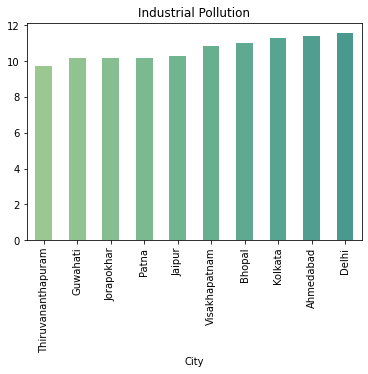

In [41]:
indusplot = df1.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True).tail(10)
indusplot.plot.bar(color=sns.color_palette("crest", n_colors=26))
plt.title('Industrial Pollution')
plt.show()

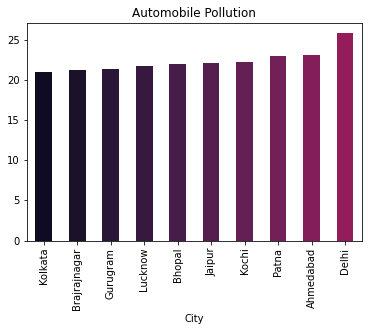

In [42]:
autoplot = df1.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True).tail(10)
autoplot.plot.bar(color=sns.color_palette("rocket", n_colors=26))
plt.title('Automobile Pollution')
plt.show()

###### Top 10 Minimum Polluting Cities before Covid19 Pandemic

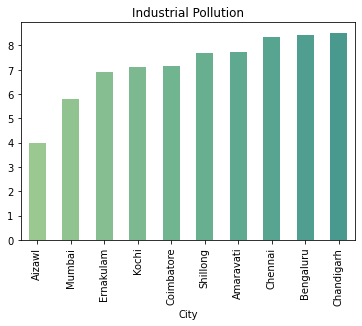

In [43]:
indusplot = df1.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True).head(10)
indusplot.plot.bar(color=sns.color_palette("crest", n_colors=26))
plt.title('Industrial Pollution')
plt.show()

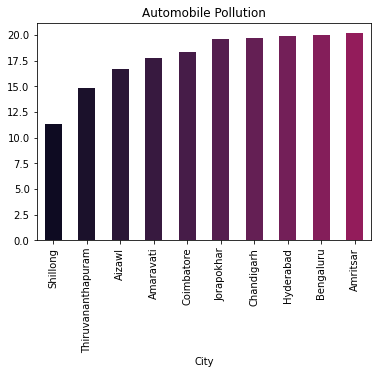

In [44]:
autoplot = df1.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True).head(10)
autoplot.plot.bar(color=sns.color_palette("rocket", n_colors=26))
plt.title('Automobile Pollution')
plt.show()

### During Lockdown Check

In [45]:
# Before 15th March 2020 covid didn't peaked in India
df2 = data.copy()

df2 = df2[data['Date'] > ('03-15-2020')] 

df2['Industrial Pollution'] = df2['SO2'] + df2['O3'] + df2['Benzene'] + df2['Toluene'] + df2['Xylene']
df2['Automobile Pollution'] = df2['PM2.5'] + df2['PM10'] + df2['NO'] + df2['NO2'] + df2['NOx'] + df2['NH3'] + df2['CO']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'], axis=1)

In [46]:
df2.head()

,City,Date,AQI,Air Quality,Industrial Pollution,Automobile Pollution
1901,Ahmedabad,2020-03-16,5.407172,Poor,13.357834,21.090646
1902,Ahmedabad,2020-03-17,5.739793,Very Poor,12.996162,24.691676
1903,Ahmedabad,2020-03-18,6.190315,Severe,14.158168,25.065173
1904,Ahmedabad,2020-03-19,6.896694,Severe,13.545407,25.745642
1905,Ahmedabad,2020-03-20,4.779123,Moderate,7.658161,21.557785


###### Top 10 Maximum Polluting Cities after Covid19 Pandemic

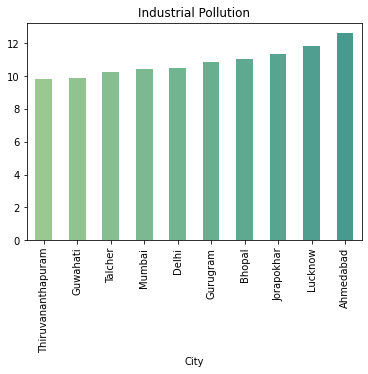

In [47]:
indusplot = df2.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True).tail(10)
indusplot.plot.bar(color=sns.color_palette("crest", n_colors=26))
plt.title('Industrial Pollution')
plt.show()

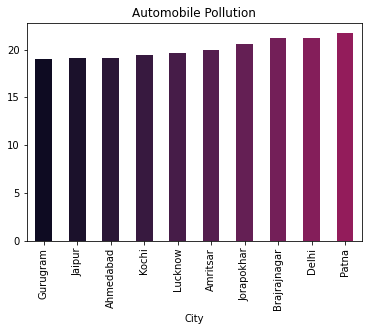

In [48]:
autoplot = df2.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True).tail(10)
autoplot.plot.bar(color=sns.color_palette("rocket", n_colors=26))
plt.title('Automobile Pollution')
plt.show()

###### Top 10 Minimum Polluting Cities after Covid19 Pandemic

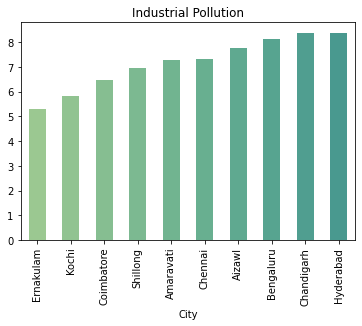

In [49]:
indusplot = df2.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True).head(10)
indusplot.plot.bar(color=sns.color_palette("crest", n_colors=26))
plt.title('Industrial Pollution')
plt.show()

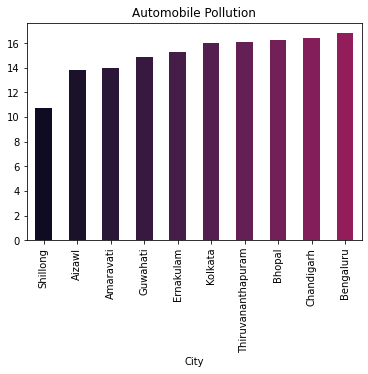

In [50]:
autoplot = df2.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True).head(10)
autoplot.plot.bar(color=sns.color_palette("rocket", n_colors=26))
plt.title('Automobile Pollution')
plt.show()

### Comparing the Results

#### Industrial Pollution

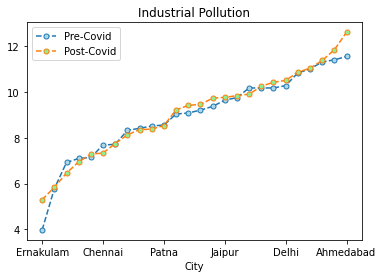

In [51]:
indusplot1 = df1.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True)
indusplot2 = df2.groupby('City')['Industrial Pollution'].median().sort_values(ascending = True)

indusplot1.plot(linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=5, label='Pre-Covid')
indusplot2.plot(linestyle='dashed', marker='o',markerfacecolor='lightgreen', markersize=5, label='Post-Covid')
plt.title('Industrial Pollution')
plt.legend()
plt.show()

#### Automobile Pollution

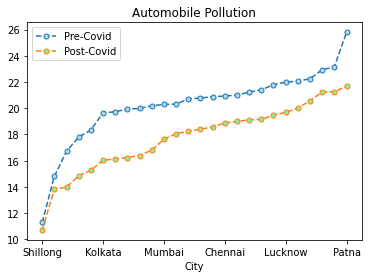

In [52]:
autoplot1 = df1.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True)
autoplot2 = df2.groupby('City')['Automobile Pollution'].median().sort_values(ascending = True)

autoplot1.plot(linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=5, label='Pre-Covid')
autoplot2.plot(linestyle='dashed', marker='o',markerfacecolor='lightgreen', markersize=5, label='Post-Covid')
plt.title('Automobile Pollution')
plt.legend()
plt.show()

From the above graphs it is observed that
1. All the pollutants in the dataset contribute to automobile and industrial pollutions to a greater extent. 
2. There is a significant downfall in both automobile as well as industrial pollutions after the covid19 pandemic hit India.  

# Feature Selection

In [53]:
dataset = pd.read_csv('Datasets\Processed_City_Day_Label_Encoded.csv')
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air Quality
0,0,2015-01-01,3.903386,4.780191,0.652325,2.955951,2.898671,3.197998,0.652325,3.354804,4.900523,0.000000,0.019803,0.000000,4.779123,1
1,0,2015-01-02,3.903386,4.780191,0.678034,2.814810,2.859913,3.197998,0.678034,3.240637,3.557061,1.543298,1.871802,1.562346,4.779123,1
2,0,2015-01-03,3.903386,4.780191,2.912351,3.010621,3.424263,3.197998,2.912351,3.403528,3.456317,2.054124,2.856470,1.178655,4.779123,1
3,0,2015-01-04,3.903386,4.780191,0.993252,2.969388,2.942859,3.197998,0.993252,2.975019,3.613078,1.691939,2.410542,0.693147,4.779123,1
4,0,2015-01-05,3.903386,4.780191,3.139833,3.109953,3.657389,3.197998,3.139833,3.697096,3.696600,2.080691,2.990217,1.329724,4.779123,1


In [54]:
X = dataset.drop(['Air Quality', 'Date'], axis = 1)
y = dataset['Air Quality']

## Calculating Correlation

In [55]:
cor = X.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,1.000000,0.032377,-0.022231,0.017875,-0.065638,-0.033213,-0.224916,-0.252777,-0.040798,-0.015214,-0.047457,0.013544,-0.051212,-0.054731
PM2.5,0.032377,1.000000,0.703609,0.444051,0.441388,0.372125,0.349321,0.239918,0.246893,0.246453,0.188815,0.184935,0.092309,0.791353
PM10,-0.022231,0.703609,1.000000,0.418219,0.418355,0.347499,0.356651,0.176728,0.269584,0.234877,0.169798,0.180667,0.034640,0.655505
NO,0.017875,0.444051,0.418219,1.000000,0.476813,0.640239,0.310961,0.282349,0.317858,-0.057991,0.239827,0.196262,0.108375,0.488596
NO2,-0.065638,0.441388,0.418355,0.476813,1.000000,0.505152,0.389654,0.265964,0.269297,0.328637,0.254600,0.215020,0.053649,0.466398
NOx,-0.033213,0.372125,0.347499,0.640239,0.505152,1.000000,0.241575,0.249185,0.283350,0.028190,0.231140,0.238598,0.078033,0.405340
NH3,-0.224916,0.349321,0.356651,0.310961,0.389654,0.241575,1.000000,0.142636,0.070984,0.156913,0.054603,-0.001562,-0.026839,0.317237
CO,-0.252777,0.239918,0.176728,0.282349,0.265964,0.249185,0.142636,1.000000,0.384988,0.021142,0.268770,0.351572,0.184933,0.542678
SO2,-0.040798,0.246893,0.269584,0.317858,0.269297,0.283350,0.070984,0.384988,1.000000,0.157295,0.167194,0.290195,0.125859,0.401969
O3,-0.015214,0.246453,0.234877,-0.057991,0.328637,0.028190,0.156913,0.021142,0.157295,1.000000,0.092791,0.115435,0.021185,0.235718


Droping PM2.5 as it has high correlation with PM10 and AQI

In [56]:
X = X.drop(['PM2.5'], axis = 1)
X.head()

,City,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,4.780191,0.652325,2.955951,2.898671,3.197998,0.652325,3.354804,4.900523,0.000000,0.019803,0.000000,4.779123
1,0,4.780191,0.678034,2.814810,2.859913,3.197998,0.678034,3.240637,3.557061,1.543298,1.871802,1.562346,4.779123
2,0,4.780191,2.912351,3.010621,3.424263,3.197998,2.912351,3.403528,3.456317,2.054124,2.856470,1.178655,4.779123
3,0,4.780191,0.993252,2.969388,2.942859,3.197998,0.993252,2.975019,3.613078,1.691939,2.410542,0.693147,4.779123
4,0,4.780191,3.139833,3.109953,3.657389,3.197998,3.139833,3.697096,3.696600,2.080691,2.990217,1.329724,4.779123


## Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [59]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models 

Deploying various models and comparing their confusion matrix and accuracy scores before and after hyperparameter tuning

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [61]:
logiregression = LogisticRegression(max_iter=10000)
logiregression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [62]:
logiregression.score(X_test_scaled, y_test)

0.8372460496613996

In [63]:
modelScores = []
modelScores.append(logiregression.score(X_test_scaled, y_test))

In [64]:
y_pred = logiregression.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

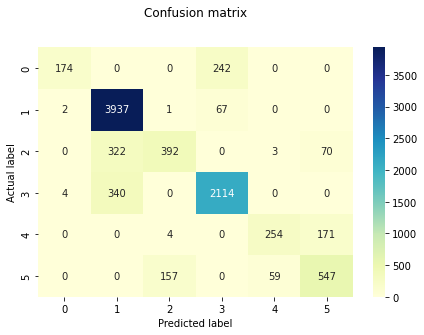

In [65]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## kNN 

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
kNN = KNeighborsClassifier()
kNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [68]:
kNN.score(X_test_scaled, y_test)

0.8227990970654627

In [69]:
modelScores.append(kNN.score(X_test_scaled, y_test))

In [70]:
y_pred = kNN.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

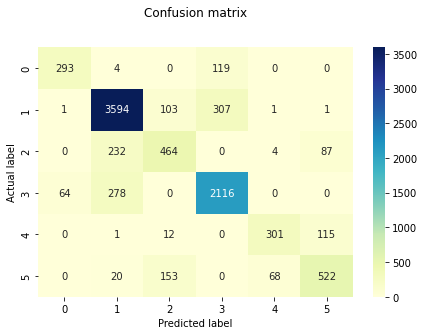

In [71]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Naive Bayes Classifier

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
GNB = GaussianNB()
GNB.fit(X_train_scaled, y_train)

GaussianNB()

In [74]:
GNB.score(X_test_scaled, y_test)

0.8879232505643341

In [75]:
modelScores.append(GNB.score(X_test_scaled, y_test))

In [76]:
y_pred = GNB.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

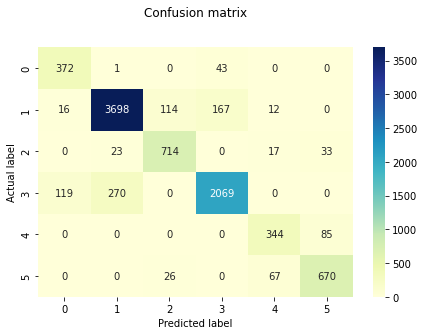

In [77]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## SVM Classifier

In [78]:
from sklearn.svm import SVC

In [79]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [ ]:
svm.score(X_test_scaled, y_test)

In [ ]:
modelScores.append(svm.score(X_test_scaled, y_test))

In [ ]:
y_pred = svm.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

In [ ]:
rf.score(X_test_scaled, y_test)

In [ ]:
modelScores.append(rf.score(X_test_scaled, y_test))

In [ ]:
y_pred = rf.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## XgBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(X_train_scaled, y_train)

In [ ]:
xgb.score(X_test_scaled, y_test)

In [ ]:
modelScores.append(xgb.score(X_test_scaled, y_test))

In [ ]:
y_pred = xgb.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Analysing the Confustion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
scores = {'Models' : ['Logistic Regression', 'kNN', "Naive Baye's", 'SVM Classifier', 'Random Forest Classifier', 'XgBoost'], 
          'Accuracy Scores' : modelScores}
dfscores = pd.DataFrame(scores)

In [ ]:
dfscores